# Data Augmentation

It includes transformations like:-
1. Flipping the image either horizontally or vertically
2. Rotating the image
3. Zooming in or out of the image
4. Cropping the image
5. Varying the color of the image/

In [17]:
# Importing all the Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import cv2
import scipy.ndimage
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator

In [29]:
# Creating our Image Data Generator for Data Augmentation

gen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.15,
        zoom_range=0.1,
        channel_shift_range=10,
        horizontal_flip=True,
        )

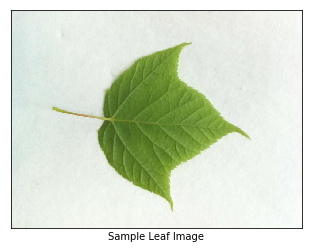

In [30]:
# Obtaining a sample image

image = np.expand_dims(scipy.ndimage.imread('sample.jpg'),0)
plt.xticks([]), plt.yticks([])
plt.xlabel("Sample Leaf Image")
plt.imshow(image[0])
plt.show()

In [31]:
# Generating batches of augmented images from this image

aug_iter = gen.flow(image)

In [32]:
# Get 10 samples of augmented images

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

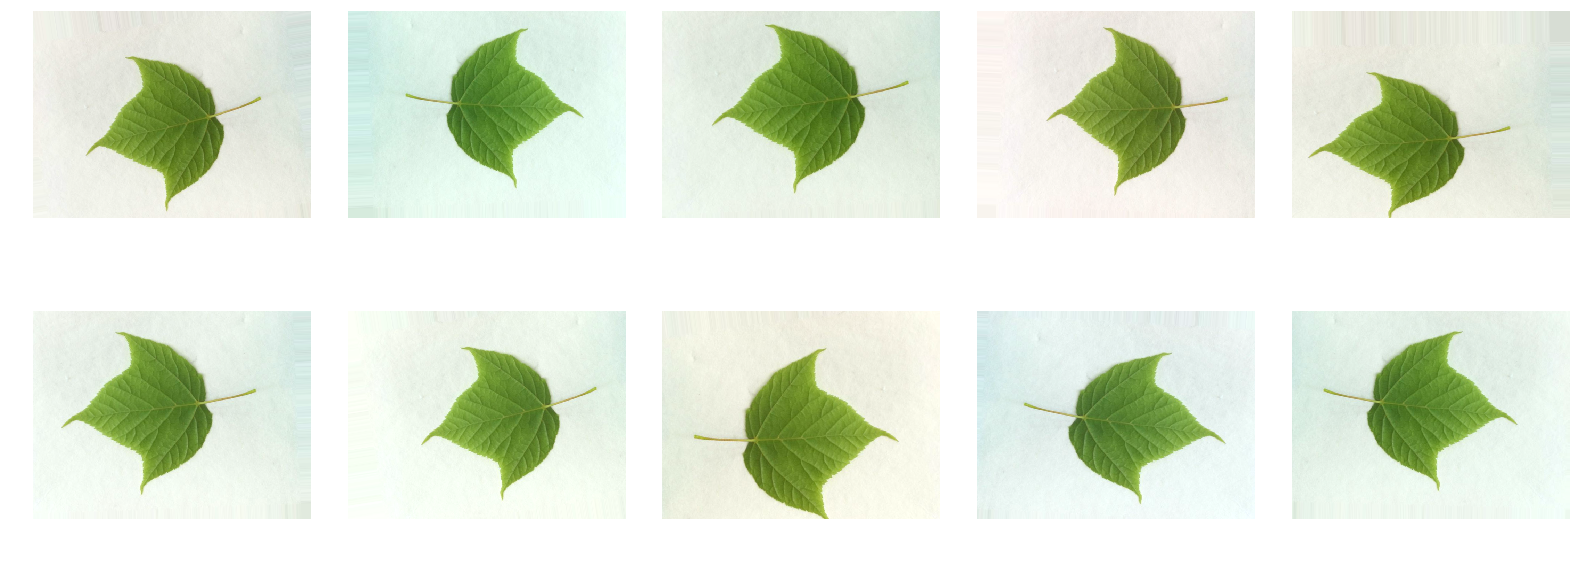

In [33]:
# Plotting the augmented images

def plots(ims, figsize=(18,12), rows=2, interp=False, titles=None):
    
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 == 0 else len(ims) // rows + 1
    
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')
        plt.tight_layout()

plots(aug_images, figsize=(22,9), rows=2)

---